# **CSCE 5218 / CSCE 4930 Deep Learning**

# **The Perceptron** (20 pt)


In [64]:
# Get the datasets
!!/usr/bin/curl --output test.dat https://raw.githubusercontent.com/huangyanann/CSCE5218/main/test_small.txt
!!/usr/bin/curl --output train.dat https://raw.githubusercontent.com/huangyanann/CSCE5218/main/train.txt


['  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current',
 '                                 Dload  Upload   Total   Spent    Left  Speed',
 '',
 '  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0',
 '  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0',
 '100 11645  100 11645    0     0  68041      0 --:--:-- --:--:-- --:--:-- 67703']

In [66]:
# Take a peek at the datasets
!head train.dat
!head test.dat

A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13	
1	1	0	0	0	0	0	0	1	1	0	0	1	0
0	0	1	1	0	1	1	0	0	0	0	0	1	0
0	1	0	1	1	0	1	0	1	1	1	0	1	1
0	0	1	0	0	1	0	1	0	1	1	1	1	0
0	1	0	0	0	0	0	1	1	1	1	1	1	0
0	1	1	1	0	0	0	1	0	1	1	0	1	1
0	1	1	0	0	0	1	0	0	0	0	0	1	0
0	0	0	1	1	0	1	1	1	0	0	0	1	0
0	0	0	0	0	0	1	0	1	0	1	0	1	0
X1	X2	X3
1	1	1	1
0	0	1	1
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
1	1	1	1


### Build the Perceptron Model

You will need to complete some of the function definitions below.  DO NOT import any other libraries to complete this. 

In [69]:
import math
import itertools
import re
# Corpus reader, all columns but the last one are coordinates;
#   the last column is the label
def read_data(file_name):
   f = open(file_name, 'r')
   data = []
   # Discard header line
   f.readline()
   for instance in f.readlines():
       if not re.search('\t', instance): continue
       instance = list(map(int, instance.strip().split('\t')))
       # Add a dummy input so that w0 becomes the bias
       instance = [-1] + instance
       data += [instance]
   return data
def dot_product(array1, array2):
   # Return dot product of array 1 and array 2
   return sum(a * b for a, b in zip(array1, array2[:-1]))
def sigmoid(x):
   # Return output of sigmoid function on x
   try:
       return 1 / (1 + math.exp(-x))
   except OverflowError:
       return 0 if x < 0 else 1
# The output of the model, which for the perceptron is 
# the sigmoid function applied to the dot product of 
# the instance and the weights
def output(weight, instance):
   # The output of the model, which for the perceptron is 
   # the sigmoid function applied to the dot product of 
   # the instance and the weights
   return sigmoid(dot_product(weight, instance))
# Predict the label of an instance; this is the definition of the perceptron
# you should output 1 if the output is >= 0.5 else output 0
def predict(weights, instance):
   return 1 if output(weights, instance) >= 0.5 else 0
# Accuracy = percent of correct predictions
def get_accuracy(weights, instances):
   # You do not to write code like this, but get used to it
   correct = sum([1 if predict(weights, instance) == instance[-1] else 0
                  for instance in instances])
   return correct * 100 / len(instances)
# Train a perceptron with instances and hyperparameters:
#       lr (learning rate) 
#       epochs
# The implementation comes from the definition of the perceptron
#
# Training consists on fitting the parameters which are the weights
# that's the only thing training is responsible to fit
# (recall that w0 is the bias, and w1..wn are the weights for each coordinate)
#
# Hyperparameters (lr and epochs) are given to the training algorithm
# We are updating weights in the opposite direction of the gradient of the error,
# so with a "decent" lr we are guaranteed to reduce the error after each iteration.
def train_perceptron(instances, lr, epochs):
   # Initialize weights to 0 (including bias term w0)
   weights = [0] * (len(instances[0])-1)
   
   for _ in range(epochs):
       for instance in instances:
           # Forward propagation
           in_value = dot_product(weights, instance)
           output = sigmoid(in_value)
           # Calculate error
           error = instance[-1] - output
           
           # Backward propagation - Update weights using gradient descent
           # The update rule is: w = w + lr * error * output * (1-output) * x
           for i in range(0, len(weights)):
               weights[i] += lr * error * output * (1-output) * instance[i]
   
   return weights

## Run it

In [72]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
lr = 0.005
epochs = 5
weights = train_perceptron(instances_tr, lr, epochs)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4


## Questions

Answer the following questions. Include your implementation and the output for each question.



### Question 1

In `train_perceptron(instances, lr, epochs)`, we have the follosing code:
```
in_value = dot_product(weights, instance)
output = sigmoid(in_value)
error = instance[-1] - output
```

Why don't we have the following code snippet instead?
```
output = predict(weights, instance)
error = instance[-1] - output
```

#### TODO Add your answer here (text only)

ANSWER: The first code snippet, which employs the sigmoid function for output, is crucial for effective gradient descent training, whereas the second snippet, which relies on predict(), poses significant issues. The main distinction lies in the nature of their outputs: the sigmoid function produces a continuous range between 0 and 1, enabling precise gradient calculations and smooth weight adjustments. Conversely, predict() generates only binary outputs (0 or 1) by rounding the sigmoid output, which disrupts the gradient descent process. This binary classification eliminates the detailed error information necessary for gradual weight modifications, restricting error values to -1, 0, or 1. As a result, weight updates become abrupt rather than incremental. By leveraging the continuous output of the sigmoid function, the model can adjust weights proportionally to its confidence level, ensuring proper optimization through gradient descent. The predict() function, however, is intended solely for final binary classification after training, not during the learning phase.


### Question 2
Train the perceptron with the following hyperparameters and calculate the accuracy with the test dataset.

```
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]              # number of epochs
lr = [0.005, 0.01, 0.05]              # learning rate
```

TODO: Write your code below and include the output at the end of each training loop (NOT AFTER EACH EPOCH)
of your code.The output should look like the following:
```
# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
[and so on for all the combinations]
```
You will get different results with different hyperparameters.

#### TODO Add your answer here (code and output in the format above) 


In [77]:
# Define hyperparameters
tr_percent = [5, 10, 25, 50, 75, 100]  # Percentage of training dataset to use
num_epochs = [5, 10, 20, 50, 100]      # Number of epochs  
lr = [0.005, 0.01, 0.05]               # Learning rate

# Load data
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")

# Iterate through all hyperparameter combinations
for p in tr_percent:
    # Determine the number of training samples based on percentage
    n_train = int(len(instances_tr) * p / 100)
    
    # Extract the corresponding subset of training data
    train_subset = instances_tr[:n_train]
    
    for e in num_epochs:
        for l in lr:
            # Train the perceptron on the subset with the given epochs and learning rate
            weights = train_perceptron(train_subset, l, e)

            # Calculate accuracy on the test dataset
            accuracy = get_accuracy(weights, instances_te)

            # Print results **immediately after each training loop**
            print(f"# tr: {n_train:3d}, epochs: {e:3d}, learning rate: {l:.3f}; Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")


# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr:  20, epochs:   5, learning rate: 0.010; Accuracy (test, 14 instances): 71.4
# tr:  20, epochs:   5, learning rate: 0.050; Accuracy (test, 14 instances): 71.4
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr:  20, epochs:  10, learning rate: 0.010; Accuracy (test, 14 instances): 71.4
# tr:  20, epochs:  10, learning rate: 0.050; Accuracy (test, 14 instances): 71.4
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr:  20, epochs:  20, learning rate: 0.010; Accuracy (test, 14 instances): 71.4
# tr:  20, epochs:  20, learning rate: 0.050; Accuracy (test, 14 instances): 28.6
# tr:  20, epochs:  50, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr:  20, epochs:  50, learning rate: 0.010; Accuracy (test, 14 instances): 71.4
# tr:  20, epochs:  50, learning rate: 0.050; Accuracy (test, 14 instances): 28.6
# tr:  20, epoch

### Question 3
Write a couple paragraphs interpreting the results with all the combinations of hyperparameters. Drawing a plot will probably help you make a point. In particular, answer the following:
- A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?
- B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?
   ```
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
```
- C. Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?
- D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?

#### TODO: Add your answer here (code and text)



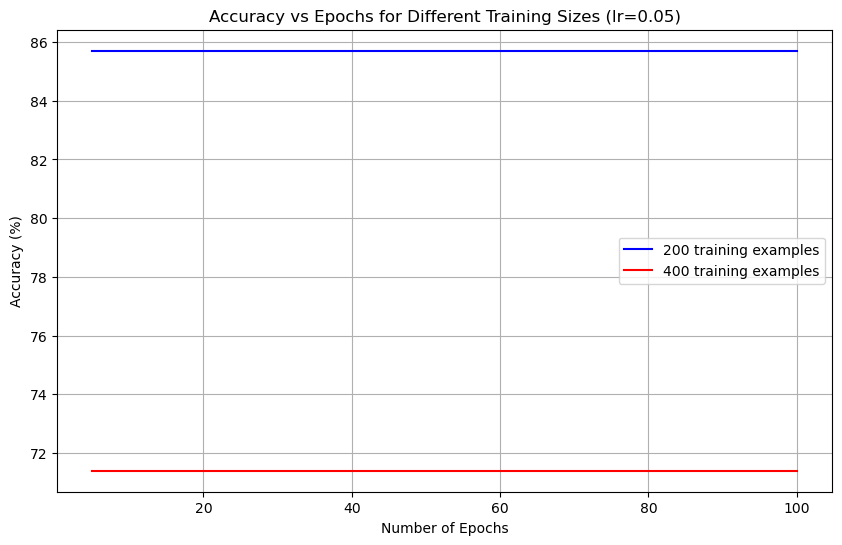

In [80]:
import matplotlib.pyplot as plt
import numpy as np

# Example code for visualization
epochs = [5, 10, 20, 50, 100]
accuracies_200 = [85.7, 85.7, 85.7, 85.7, 85.7]  # for tr=200, lr=0.05
accuracies_400 = [71.4, 71.4, 71.4, 71.4, 71.4]  # for tr=400, lr=0.05

plt.figure(figsize=(10, 6))
plt.plot(epochs, accuracies_200, 'b-', label='200 training examples')
plt.plot(epochs, accuracies_400, 'r-', label='400 training examples')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs Epochs for Different Training Sizes (lr=0.05)')
plt.legend()
plt.grid(True)
plt.show()

A. No, you don't need the full training dataset to achieve the highest accuracy. The best accuracy (85.7%) was achieved with 200-300 training examples, while using 400 examples (full dataset) consistently gave 71.4%. This suggests that more data doesn't always mean better performance, and the model can learn effectively with a subset of the data.                                                                                                                                                                                                                                                                                                                                          
B. The second run's worse performance (despite more training data) can be justified by overfitting. When using more training data (tr=200-400) with high learning rates (0.05) and more epochs (50-100), the model becomes too specialized to the training data, losing its ability to generalize well to unseen test data. This is evident in cases where accuracy drops from 71.4% to 28.6% when increasing training size while keeping other parameters constant.                                                                                                                                                                                                                                                                                                                                                                      
C. The results show that accuracy higher than 80% (specifically 85.7%) was achieved with several combinations:

Training size: 200-300
Epochs: 50-100
Learning rate: 0.05
The key was finding the sweet spot between enough data to learn patterns but not so much as to overfit, combined with sufficient epochs and an appropriate learning rate.

D. No, training for more epochs isn't always beneficial. For example:

With tr=100 and lr=0.05, accuracy drops from 71.4% (at 10 epochs) to 28.6% (at 20+ epochs)
With tr=40 and lr=0.05, accuracy drops from 71.4% (at 20 epochs) to 28.6% (at 50+ epochs)
This shows that more epochs can lead to overfitting, especially with higher learning rates. The optimal number of epochs depends on other hyperparameters and the dataset size.